In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

### Exploración y Segmentación de Clientes
#### Super Bank


1.   Integrante 1: Wagner Dueñas
2.   Integrante 2: Mauricio Rumbea

Fecha entrega 11 de enero 2025


In [104]:
df = pd.read_csv("SuperBanck.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,NaN,0.818182,95.4,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,NaN,201.802084,NaN,0.0,12.0
1,C10002,3202.467416,NaN,0.0,NaN,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,NaN,12.0
2,C10003,2495.148862,1.000000,NaN,773.17,0.0,NaN,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.0,12.0
3,C10004,NaN,0.636364,1499.0,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,NaN,0.0,12.0
4,C10005,817.714335,1.000000,16.0,NaN,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.0,12.0


## 1. Análisis Exploratorio de Datos




In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8055 non-null   float64
 2   BALANCE_FREQUENCY                 8055 non-null   float64
 3   PURCHASES                         8055 non-null   float64
 4   ONEOFF_PURCHASES                  8055 non-null   float64
 5   INSTALLMENTS_PURCHASES            8055 non-null   float64
 6   CASH_ADVANCE                      8055 non-null   float64
 7   PURCHASES_FREQUENCY               8055 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8055 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8055 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8055 non-null   float64
 11  CASH_ADVANCE_TRX                  8055 non-null   float64
 12  PURCHA

In [106]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8054.000000,8055.000000,7782.000000,8055.000000,8055.000000
mean,1564.721016,0.877907,992.203722,593.487287,411.606940,987.140035,0.489973,0.201413,0.366736,0.135315,3.202110,14.736934,4469.021711,1729.655798,855.152072,0.155901,11.519181
std,2077.820226,0.235817,2077.103541,1665.083373,915.321611,2126.252235,0.401603,0.297820,0.397965,0.200593,6.575732,24.815914,3615.216282,2870.333410,2304.057128,0.294644,1.331682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.770565,0.888889,35.955000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,381.405386,169.007295,0.000000,12.000000
50%,876.577775,1.000000,356.150000,40.700000,87.500000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,858.811070,309.367321,0.000000,12.000000
75%,2063.888893,1.000000,1106.160000,575.250000,468.050000,1116.400384,0.916667,0.272727,0.750000,0.222222,4.000000,17.000000,6100.000000,1898.019790,817.732461,0.142857,12.000000
max,19043.138560,1.000000,41050.400000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 1.1 Tratamiento de Datos Faltantes

In [107]:
df.isnull().sum()

CUST_ID                                0
BALANCE                              895
BALANCE_FREQUENCY                    895
PURCHASES                            895
ONEOFF_PURCHASES                     895
INSTALLMENTS_PURCHASES               895
CASH_ADVANCE                         895
PURCHASES_FREQUENCY                  895
ONEOFF_PURCHASES_FREQUENCY           895
PURCHASES_INSTALLMENTS_FREQUENCY     895
CASH_ADVANCE_FREQUENCY               895
CASH_ADVANCE_TRX                     895
PURCHASES_TRX                        895
CREDIT_LIMIT                         896
PAYMENTS                             895
MINIMUM_PAYMENTS                    1168
PRC_FULL_PAYMENT                     895
TENURE                               895
dtype: int64

In [108]:
# calcular el porcentaje de datos faltantes
porcentaje_faltantes_varias = (df['BALANCE'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en 15 de las columnas es: {porcentaje_faltantes_varias:.2f}%")

porcentaje_faltantes_CREDIT_LIMIT = (df['CREDIT_LIMIT'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT es: {porcentaje_faltantes_CREDIT_LIMIT:.2f}%")

porcentaje_faltantes_MINIMUM_PAYMENTS = (df['MINIMUM_PAYMENTS'].isnull().sum() / len(df)) * 100
print(f"Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS es: {porcentaje_faltantes_MINIMUM_PAYMENTS:.2f}%")

Porcentaje de valores faltantes en 15 de las columnas es: 10.00%
Porcentaje de valores faltantes en la columna 'CREDIT_LIMIT es: 10.01%
Porcentaje de valores faltantes en la columna 'MINIMUM_PAYMENTS es: 13.05%


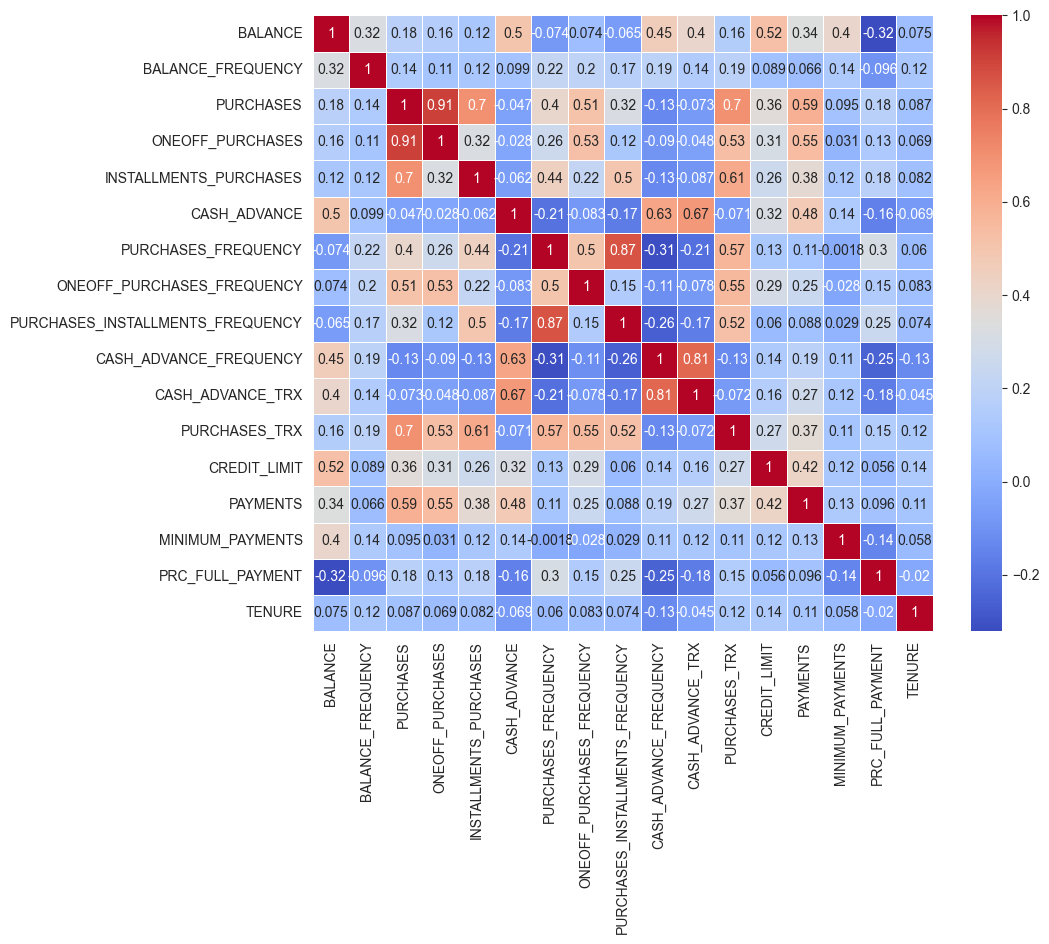

In [109]:
# analizar la correlacion que existe entre las variables
columnas_faltantes = df.columns[df.isnull().any()]
df_subset = df[columnas_faltantes]
matriz_corr = df_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [110]:
def imputar_purchases(df):
  """
  Imputa los valores de la columna 'PURCHASES' basándose en las columnas 'ONEOFF_PURCHASES' e 'INSTALLMENTS_PURCHASES'.

  """

  df_imputado = df.copy()

  #PURCHASES nulo, ONEOFF_PURCHASES y INSTALLMENTS_PURCHASES no nulos
  df_imputado['PURCHASES'] = np.where(
      (df_imputado['PURCHASES'].isnull()) & 
      (~df_imputado['ONEOFF_PURCHASES'].isnull()) & 
      (~df_imputado['INSTALLMENTS_PURCHASES'].isnull()), 
      df_imputado['ONEOFF_PURCHASES'] + df_imputado['INSTALLMENTS_PURCHASES'],
      df_imputado['PURCHASES']
  )

  return df_imputado

In [111]:
df_imputado = imputar_purchases(df)
df_imputado.isnull().sum()

CUST_ID                                0
BALANCE                              895
BALANCE_FREQUENCY                    895
PURCHASES                            166
ONEOFF_PURCHASES                     895
INSTALLMENTS_PURCHASES               895
CASH_ADVANCE                         895
PURCHASES_FREQUENCY                  895
ONEOFF_PURCHASES_FREQUENCY           895
PURCHASES_INSTALLMENTS_FREQUENCY     895
CASH_ADVANCE_FREQUENCY               895
CASH_ADVANCE_TRX                     895
PURCHASES_TRX                        895
CREDIT_LIMIT                         896
PAYMENTS                             895
MINIMUM_PAYMENTS                    1168
PRC_FULL_PAYMENT                     895
TENURE                               895
dtype: int64

In [112]:
filas_faltantes = df_imputado[df_imputado[columnas_faltantes].isnull().any(axis=1)]

# Mostrar las filas
filas_faltantes.shape

(7338, 18)

In [113]:
#Porcentaje de faltantes con al menos 1 valor
filas_faltantes.shape[0]/len(df_imputado)

0.8198882681564246

In [114]:
faltantes_2omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes2 = df_imputado[faltantes_2omas > 1]
filas_faltantes2.shape

(4477, 18)

In [115]:
#Porcentaje de filas con 2 o mas valores faltantes
4477 / len(df_imputado)

0.5002234636871509

In [116]:
faltantes_3omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes3 = df_imputado[faltantes_3omas > 2]
filas_faltantes3.shape

(2004, 18)

In [117]:
#Porcentaje de filas con 3 valores faltantes
2004/ len(df_imputado)

0.22391061452513966

In [118]:
faltantes_4omas = df_imputado[columnas_faltantes].isnull().sum(axis=1)
filas_faltantes4 = df_imputado[faltantes_4omas > 3]
filas_faltantes4.shape

(697, 18)

In [119]:
#Porcentaje de filas con 4 valores faltantes
697 / len(df_imputado)

0.07787709497206705

In [120]:
# Contar los valores faltantes por fila
valores_faltantes_por_fila = df_imputado.isnull().sum(axis=1)

# Crear una máscara para identificar las filas con 4 o más valores faltantes
filas_a_eliminar = valores_faltantes_por_fila >= 4

# Eliminar las filas identificadas con 4 o mas valores faltantes
df_imputado_limpio = df_imputado[~filas_a_eliminar]

In [121]:
df_imputado_limpio.isnull().sum()

CUST_ID                               0
BALANCE                             723
BALANCE_FREQUENCY                   723
PURCHASES                            97
ONEOFF_PURCHASES                    700
INSTALLMENTS_PURCHASES              679
CASH_ADVANCE                        716
PURCHASES_FREQUENCY                 711
ONEOFF_PURCHASES_FREQUENCY          733
PURCHASES_INSTALLMENTS_FREQUENCY    720
CASH_ADVANCE_FREQUENCY              710
CASH_ADVANCE_TRX                    738
PURCHASES_TRX                       738
CREDIT_LIMIT                        717
PAYMENTS                            705
MINIMUM_PAYMENTS                    919
PRC_FULL_PAYMENT                    688
TENURE                              711
dtype: int64

In [122]:
df_imputado_limpio.shape

(8253, 18)

In [123]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [124]:
df2 = df_imputado_limpio[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [125]:
df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7530.000000,7530.000000,8156.000000,7553.000000,7574.000000,7537.000000,7542.000000,7520.000000,7543.000000,7536.00000,7548.000000,7334.000000,7565.000000,7542.000000
mean,1568.238805,0.880786,1000.095981,594.218195,412.722384,988.266968,0.491096,0.201357,0.135931,4475.62620,1725.795180,862.443766,0.155675,11.524794
std,2081.908849,0.231716,2105.376085,1647.178511,912.360800,2122.933980,0.401059,0.297912,0.201562,3607.10712,2843.688799,2341.333526,0.294587,1.326985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.00000,0.000000,0.019163,0.000000,6.000000
25%,130.499775,0.888889,39.957500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1600.00000,384.779826,168.842611,0.000000,12.000000
50%,876.765126,1.000000,366.250000,44.700000,89.515000,0.000000,0.500000,0.083333,0.000000,3000.00000,857.298191,309.544946,0.000000,12.000000
75%,2074.176484,1.000000,1112.425000,580.090000,473.550000,1118.361104,0.916667,0.272727,0.222222,6200.00000,1897.254276,825.431876,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,30000.00000,50721.483360,76406.207520,1.000000,12.000000


Despues del análisis exporatorio y definir el df base para trabajar, se concluye que por la correlación que existe entre algunas variables del df y para evitar un efecto de multicolinealidad, la clusterización se realizará unicamente con las variables 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'. Por lo que se debe empezar a aplicar técnicas para imputar valores en dichas columnas.

Es decir que se descantan 4 columnas. Con la información restante se procede a completar los valores faltas para poder obtener la información y realizar la correcta clusterización. 

https://medium.com/@perfect_silver_rhinoceros_638/credit-card-user-clustering-analysis-47cf82230049

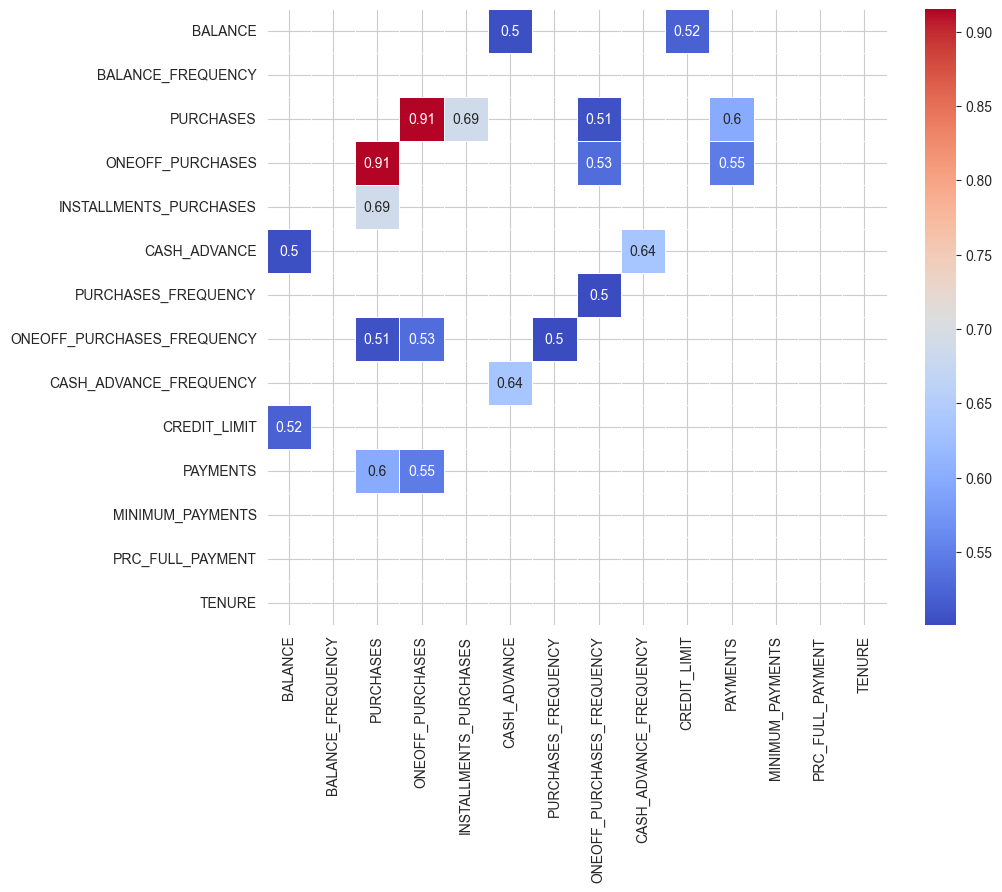

In [126]:
# Matriz de correlacion que muestra las variables mas correlacionadas >= 50%
corr_matrix = df2.corr()
umbral_corr = 0.5
alta_corr = corr_matrix[(corr_matrix.abs() > umbral_corr) & (corr_matrix != 1.0)]
plt.figure(figsize=(10, 8))
sns.heatmap(alta_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

### 1.1.1 Imputación de valores faltantes

In [127]:
# porcentajes de valores faltantes
ratio_null_data = ((df2.isnull().sum()/len(df2))*100).sort_values(ascending = False)
ratio_null_data

MINIMUM_PAYMENTS              11.135345
ONEOFF_PURCHASES_FREQUENCY     8.881619
BALANCE                        8.760451
BALANCE_FREQUENCY              8.760451
CREDIT_LIMIT                   8.687750
CASH_ADVANCE                   8.675633
TENURE                         8.615049
PURCHASES_FREQUENCY            8.615049
CASH_ADVANCE_FREQUENCY         8.602932
PAYMENTS                       8.542348
ONEOFF_PURCHASES               8.481764
PRC_FULL_PAYMENT               8.336363
INSTALLMENTS_PURCHASES         8.227311
PURCHASES                      1.175330
dtype: float64

Vemos que para la columna purchases solo nos queda poco mas de 1% de datos con valores nulos, por lo que podriamos descartarlos

In [128]:
df2_imputado = df2.copy()

In [129]:
df2_imputado = df2_imputado.dropna(how='all', subset=['PURCHASES'])

In [130]:
df2_imputado.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7436.000000,7437.000000,8156.000000,7505.000000,7529.000000,7443.000000,7452.000000,7429.000000,7451.000000,7445.000000,7453.000000,7245.000000,7469.000000,7451.000000
mean,1569.389778,0.880766,1000.095981,593.987166,413.268199,990.771151,0.490560,0.200864,0.136152,4471.124116,1725.965326,863.308925,0.155377,11.523285
std,2085.125552,0.231893,2105.376085,1650.580462,914.078186,2130.514801,0.401161,0.297449,0.201856,3609.230329,2854.336379,2347.378814,0.294087,1.329112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,130.001403,0.888889,39.957500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1600.000000,384.275314,168.938924,0.000000,12.000000
50%,879.589448,1.000000,366.250000,44.000000,89.450000,0.000000,0.500000,0.083333,0.000000,3000.000000,855.075968,309.542834,0.000000,12.000000
75%,2073.799853,1.000000,1112.425000,576.000000,473.620000,1117.794681,0.916667,0.272727,0.222222,6200.000000,1891.721179,826.013735,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.500000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [131]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES              651
INSTALLMENTS_PURCHASES        627
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS              911
PRC_FULL_PAYMENT              687
TENURE                        705
dtype: int64

In [132]:
df2_imputado[["MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"]].describe()

,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7245.000000,7469.000000,7451.000000
mean,863.308925,0.155377,11.523285
std,2347.378814,0.294087,1.329112
min,0.019163,0.000000,6.000000
25%,168.938924,0.000000,12.000000
50%,309.542834,0.000000,12.000000
75%,826.013735,0.142857,12.000000
max,76406.207520,1.000000,12.000000


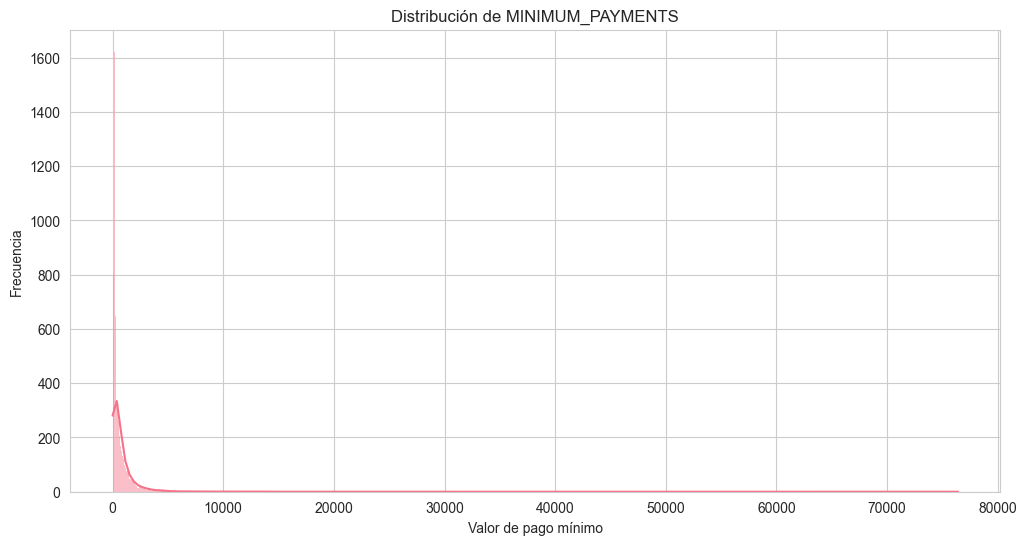

In [133]:
# Para MINIMUM_PAYMENTS (variable continua con muchos outliers)
plt.figure(figsize=(12, 6))
sns.histplot(data=df2_imputado, x='MINIMUM_PAYMENTS', kde=True)  # Histograma con curva de densidad
plt.title('Distribución de MINIMUM_PAYMENTS')
plt.xlabel('Valor de pago mínimo')
plt.ylabel('Frecuencia')
plt.show()

MINIMUM_PAYMENTS (Histograma con densidad):
* El eje X muestra los valores de pago mínimo (de 0 a 80000)
* El eje Y muestra la frecuencia
Hay una concentración muy alta de pagos mínimos cercanos a 0
La distribución tiene una "cola larga" hacia la derecha
Hay muy pocos casos con pagos mínimos altos

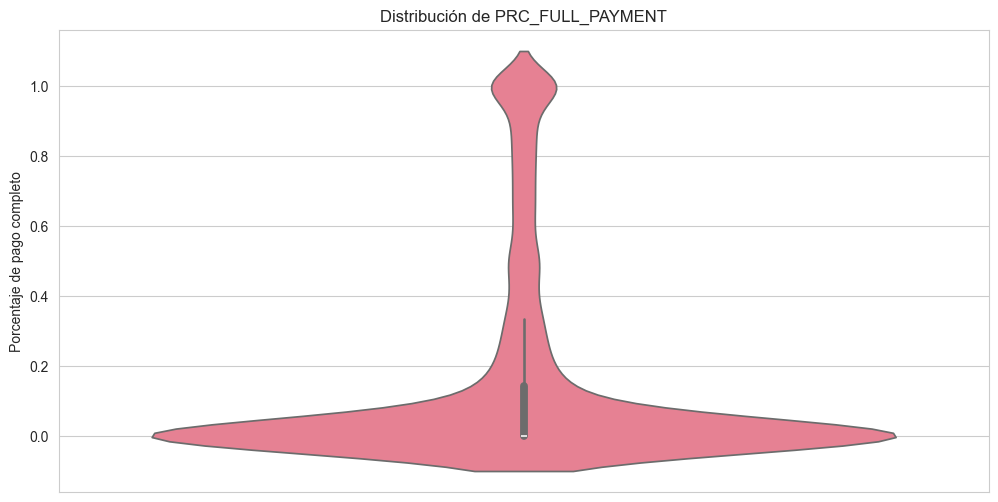

In [134]:
# Para PRC_FULL_PAYMENT (variable de proporción entre 0 y 1)
plt.figure(figsize=(12, 6))
sns.violinplot(y=df2_imputado['PRC_FULL_PAYMENT'])  # Violin plot muestra mejor la densidad
plt.title('Distribución de PRC_FULL_PAYMENT')
plt.ylabel('Porcentaje de pago completo')
plt.show()

PRC_FULL_PAYMENT (Violin plot):
* El eje Y muestra el porcentaje de pago completo (0 a 1)
* El ancho del "violín" muestra la densidad de observaciones

* Tiene forma bimodal (dos "bultos")
* Hay una concentración alta cerca de 0 (personas que pagan poco)
* Hay otra concentración cerca de 1 (personas que pagan completo)
* La parte del medio es más delgada (pocos casos intermedios)
* La línea negra del medio muestra el rango intercuartílico

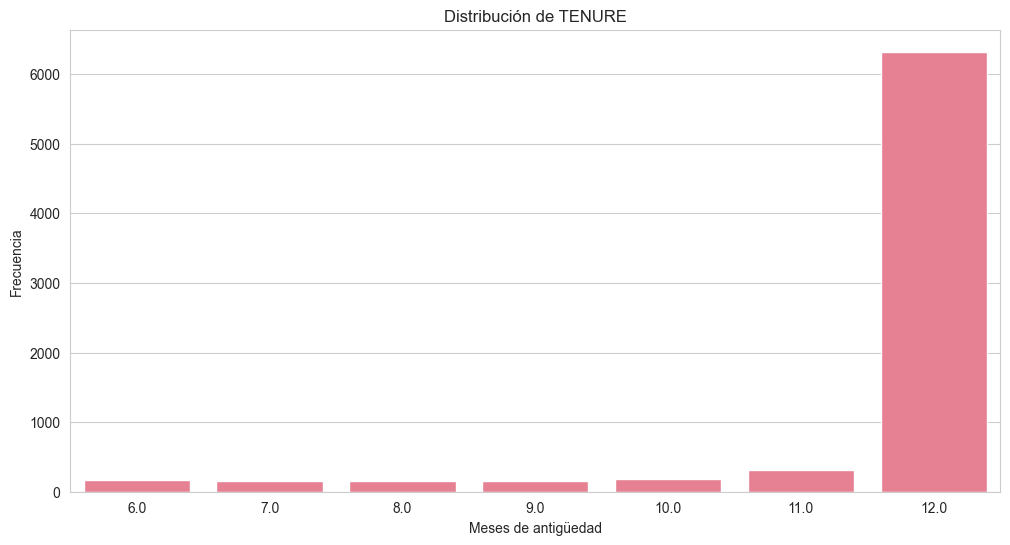

In [135]:
# Para TENURE (variable discreta/categórica ordinal)
plt.figure(figsize=(12, 6))
sns.countplot(data=df2_imputado, x='TENURE')  # Gráfico de barras para datos discretos
plt.title('Distribución de TENURE')
plt.xlabel('Meses de antigüedad')
plt.ylabel('Frecuencia')
plt.show()

TENURE (Gráfico de barras):
Muestra la distribución de la antigüedad de los clientes en meses
* El eje X muestra los meses (6 a 12)
* El eje Y muestra la frecuencia (cantidad de clientes)

La mayoría de los clientes (más de 6000) tienen 12 meses de antigüedad
Hay una distribución muy desigual, con pocos clientes en los meses 6-11

Por ser una variable discreta y temporal, el uso de la moda parece ser apropiado

In [136]:
# Usando moda
df2_imputado['TENURE'] = df2_imputado['TENURE'].fillna(df2_imputado['TENURE'].mode()[0])

*MINIMUM_PAYMENTS*

* La variable muestra una distribución altamente sesgada (asimétrica)
* Tiene una alta concentración de valores cercanos a cero
* Presenta valores atípicos significativos

KNN es apropiado porque:
* Preserva la estructura no normal de los datos
* No se ve tan afectado por los valores atípicos como la media
* Considera las relaciones con otras variables del dataset

*PRC_FULL_PAYMENT*

* Exhibe una distribución bimodal clara (dos picos)
* Los valores están restringidos entre 0 y 1
* Muestra patrones de comportamiento específicos (clientes que pagan todo o casi nada)

KNN es adecuado porque:

* Mantiene la naturaleza bimodal de la distribución
* Respeta los límites naturales de la variable (0-1)
* Puede capturar patrones complejos en los datos

In [137]:
# 1. Primero, verifica que estás seleccionando las columnas correctamente
columnas_a_imputar = ['MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# 2. Asegúrate de que el DataFrame para imputar solo contenga las columnas numéricas necesarias
df_para_imputar = df2_imputado[columnas_a_imputar].copy()

# 3. Configura el KNNImputer
imputer = KNNImputer(
    n_neighbors=5,
    weights='uniform',
    metric='nan_euclidean'
)

In [138]:
# 4. Aplica la imputación y asegúrate de que se guarda correctamente
datos_imputados = imputer.fit_transform(df_para_imputar)


In [139]:
# 5. Convierte el resultado a DataFrame
df_imputado = pd.DataFrame(
    datos_imputados, 
    columns=columnas_a_imputar,
    index=df2_imputado.index  # Importante: mantener los índices
)

In [140]:
# 6. Actualiza las columnas en el DataFrame original
df2_imputado[columnas_a_imputar] = df_imputado

Valores nulos después de la imputación:

In [141]:
df2_imputado[columnas_a_imputar].isnull().sum()

MINIMUM_PAYMENTS    0
PRC_FULL_PAYMENT    0
dtype: int64

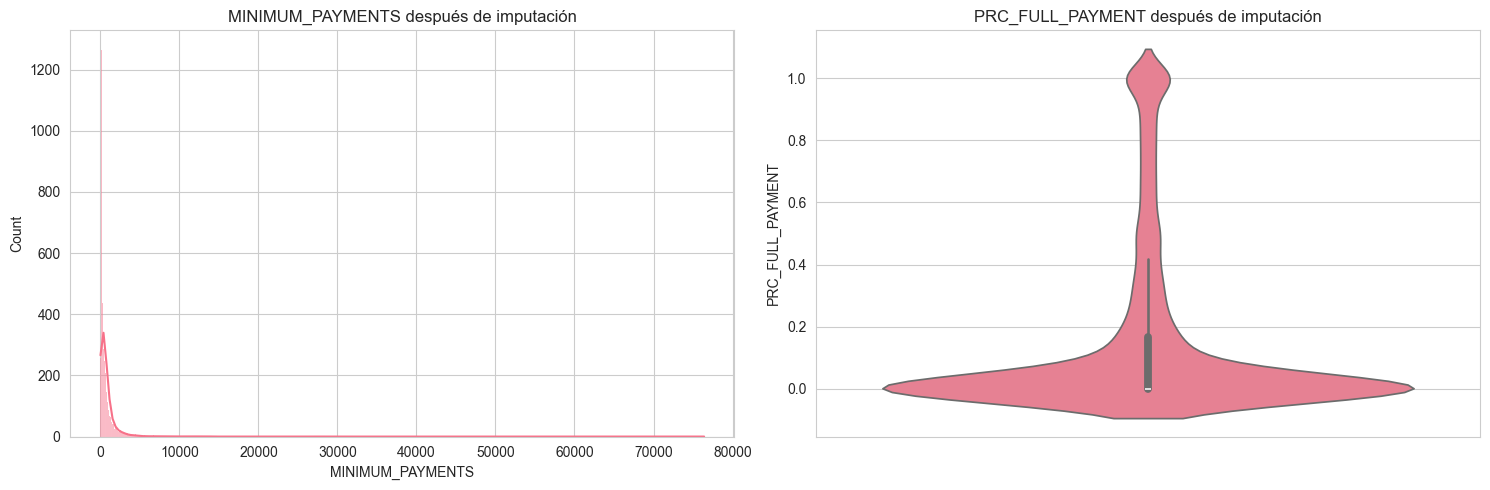

In [142]:
# Visualizar las distribuciones después de la imputación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# MINIMUM_PAYMENTS después de imputación
sns.histplot(data=df2_imputado, x='MINIMUM_PAYMENTS', kde=True, ax=ax1)
ax1.set_title('MINIMUM_PAYMENTS después de imputación')

# PRC_FULL_PAYMENT después de imputación
sns.violinplot(y=df2_imputado['PRC_FULL_PAYMENT'], ax=ax2)
ax2.set_title('PRC_FULL_PAYMENT después de imputación')

plt.tight_layout()
plt.show()

Vemos que la imputacion con KNN mantuvo la distrucion de los datos

In [143]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES              651
INSTALLMENTS_PURCHASES        627
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Ahora procedemos a imputar ONEOFF_PURCHASES e INSTALLMENTS_PURCHASES  considerando la relacion matematica 

PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES 

In [144]:
# Donde PURCHASES está completo pero faltan las otras dos
mask_purchase_complete = (
    df2_imputado['PURCHASES'].notna() & 
    (df2_imputado['ONEOFF_PURCHASES'].isna() | df2_imputado['INSTALLMENTS_PURCHASES'].isna())
)

# Si tenemos ONEOFF_PURCHASES, podemos calcular INSTALLMENTS_PURCHASES
mask_oneoff = (
    df2_imputado['PURCHASES'].notna() & 
    df2_imputado['ONEOFF_PURCHASES'].notna() & 
    df2_imputado['INSTALLMENTS_PURCHASES'].isna()
)
df2_imputado.loc[mask_oneoff, 'INSTALLMENTS_PURCHASES'] = \
    df2_imputado.loc[mask_oneoff, 'PURCHASES'] - df2_imputado.loc[mask_oneoff, 'ONEOFF_PURCHASES']

# Si tenemos INSTALLMENTS_PURCHASES, podemos calcular ONEOFF_PURCHASES
mask_installments = (
    df2_imputado['PURCHASES'].notna() & 
    df2_imputado['ONEOFF_PURCHASES'].isna() & 
    df2_imputado['INSTALLMENTS_PURCHASES'].notna()
)
df2_imputado.loc[mask_installments, 'ONEOFF_PURCHASES'] = \
    df2_imputado.loc[mask_installments, 'PURCHASES'] - df2_imputado.loc[mask_installments, 'INSTALLMENTS_PURCHASES']

Procedemos a ver la cantidad de valores nulos de las columnas mencionadas

In [145]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES               46
INSTALLMENTS_PURCHASES         46
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Procedemos a ver el porcentaje de filas con valores nulos restantes:

In [146]:
# Calcular el total de filas
total_filas = len(df2_imputado)

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df2_imputado.isnull().sum() / total_filas * 100).round(2)

# Mostrar solo las columnas que tienen valores nulos
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos[porcentaje_nulos > 0])

Porcentaje de valores nulos por columna:
BALANCE                       8.83
BALANCE_FREQUENCY             8.82
ONEOFF_PURCHASES              0.56
INSTALLMENTS_PURCHASES        0.56
CASH_ADVANCE                  8.74
PURCHASES_FREQUENCY           8.63
ONEOFF_PURCHASES_FREQUENCY    8.91
CASH_ADVANCE_FREQUENCY        8.64
CREDIT_LIMIT                  8.72
PAYMENTS                      8.62
dtype: float64


In [147]:
# Para los casos donde no podemos usar la relación matemática
columnas_compras = ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']
imputer = KNNImputer(n_neighbors=5)

# Crear un DataFrame temporal solo con las columnas que necesitamos
df_temp = df2_imputado[columnas_compras].copy()

# Aplicar KNN a todo el conjunto
datos_imputados = imputer.fit_transform(df_temp)

# Convertir el resultado a DataFrame manteniendo los nombres de columnas
df_imputado = pd.DataFrame(datos_imputados, columns=columnas_compras, index=df2_imputado.index)

# Actualizar solo las columnas imputadas en el DataFrame original
df2_imputado[columnas_compras] = df_imputado

Valores nulos después de imputación:

In [148]:
df2_imputado[columnas_compras].isnull().sum()

ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
dtype: int64

Verificar que se mentenga la relacion matematica ONEOFF_PURCHASES e INSTALLMENTS_PURCHASES = 0

In [149]:
diferencia = abs(df2_imputado['PURCHASES'] - 
                (df2_imputado['ONEOFF_PURCHASES'] + df2_imputado['INSTALLMENTS_PURCHASES']))

diferencia.describe()

count    8156.000000
mean        5.288101
std        96.219620
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5597.390845
dtype: float64

Luego de la imputacion, al verificar la relación matemática (PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES), encontramos algunas discrepancias:
* La mayoría de los casos (hasta el 75%) tienen una diferencia de 0, lo cual es ideal
* Sin embargo, hay algunos casos con diferencias significativas (máximo de 5597)
* La desviación estándar de 96.22 sugiere que hay valores atípicos importantes

In [150]:
# Ajustar los valores para que cumplan la relación
mask_diferencia = diferencia > 0.01  # Donde la diferencia es significativa
if mask_diferencia.any():
    # Ajustar proporcionalmente
    total_actual = df2_imputado.loc[mask_diferencia, 'ONEOFF_PURCHASES'] + \
                  df2_imputado.loc[mask_diferencia, 'INSTALLMENTS_PURCHASES']
    factor = df2_imputado.loc[mask_diferencia, 'PURCHASES'] / total_actual
    
    df2_imputado.loc[mask_diferencia, 'ONEOFF_PURCHASES'] *= factor
    df2_imputado.loc[mask_diferencia, 'INSTALLMENTS_PURCHASES'] *= factor

In [151]:
df2_imputado.isnull().sum()

BALANCE                       720
BALANCE_FREQUENCY             719
PURCHASES                       0
ONEOFF_PURCHASES                0
INSTALLMENTS_PURCHASES          0
CASH_ADVANCE                  713
PURCHASES_FREQUENCY           704
ONEOFF_PURCHASES_FREQUENCY    727
CASH_ADVANCE_FREQUENCY        705
CREDIT_LIMIT                  711
PAYMENTS                      703
MINIMUM_PAYMENTS                0
PRC_FULL_PAYMENT                0
TENURE                          0
dtype: int64

Hasta aqui, Wagner

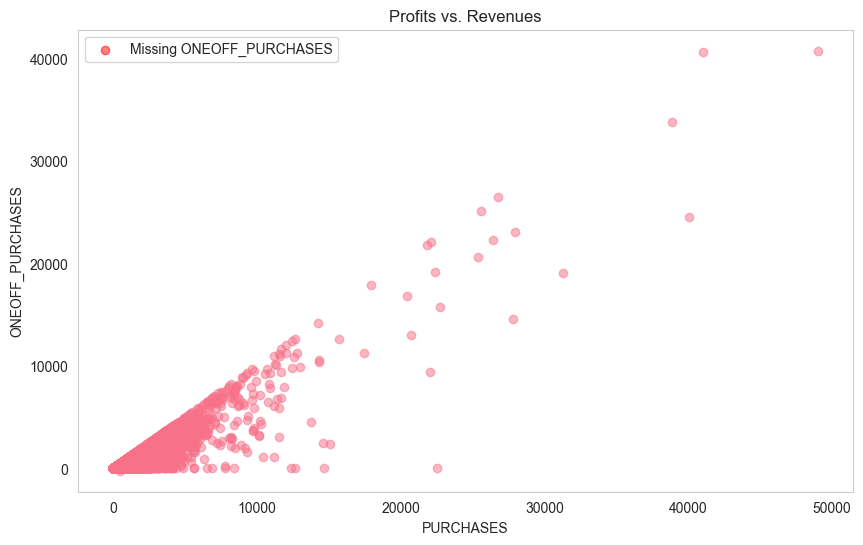

In [152]:
# Dada la alta correlación entre Purchases con OneOff Purchases e Installments Purchases, se imputó los valores mediante interpolacion
# visualizar Purchases vs OneOff Purchases
plt.figure(figsize=(10, 6))
plt.scatter(df2_imputado['PURCHASES'], df2_imputado['ONEOFF_PURCHASES'], alpha=0.5)
plt.scatter(df2_imputado['PURCHASES'][df2_imputado['ONEOFF_PURCHASES'].isna()], [1]*sum(df2_imputado['ONEOFF_PURCHASES'].isna()), color='red', alpha=0.5, label='Missing ONEOFF_PURCHASES')
plt.title('Profits vs. Revenues')
plt.xlabel('PURCHASES')
plt.ylabel('ONEOFF_PURCHASES')
plt.legend()
plt.grid()
plt.show()

In [153]:
# interpolar OneOff Purchases con Purchases
df2_imputado = df2_imputado.sort_values('PURCHASES')
df_revenue_imputed['Revenues_M'] = df['Revenues_M'].interpolate(method='linear')

df_revenue_imputed = df_revenue_imputed.sort_values('Profits_M')
df_revenue_imputed['Revenues_M'] = df['Revenues_M'].interpolate(method='linear')

KeyError: 'Revenues_M'

## 1.2  Detección y Eliminación de Valores atípicos

## 1.3 Transformación de datos

## 1.4 Anallisis Univariado

## 1.5 Generación de Insights

# 2. Clustering

## 2.1 Aplicar Clustering

## 2.2 Caracterización de Clusters